In [1]:
import pandas as pd
import geopandas as gpd
import shapely
import requests
import json
import math

## CENSUS Cartographic Boundary Files

In [260]:
fips_2009 = gpd.read_file('../data/shape/tl_2009_47037_tract00/tl_2009_47037_tract00.shp')
fips_2019 = gpd.read_file('../data/shape/tl_2019_47_tract/tl_2019_47_tract.shp')
fips_2020 = gpd.read_file('../data/shape/tl_2020_47_tract/tl_2020_47_tract.shp')

In [261]:
fips_2009 = fips_2009\
    .rename(columns = {'CTIDFP00' : 'tract_geoid', 'NAMELSAD00' : 'name'})\
    [['tract_geoid', 'name',  'geometry']]
fips_2019 = fips_2019\
    .loc[fips_2019['GEOID'].str.slice(0,5) == '47037']\
    .rename(columns = {'GEOID' : 'tract_geoid', 'NAMELSAD' : 'name'})\
    [['tract_geoid', 'name', 'geometry']]
fips_2020 = fips_2020\
    .loc[fips_2020['GEOID'].str.slice(0,5) == '47037']\
    .rename(columns = {'GEOID' : 'tract_geoid', 'NAMELSAD' : 'name'})\
    [['tract_geoid', 'name', 'geometry']]

In [215]:
# within
fips_09_19 = gpd\
    .overlay(
        fips_2009, fips_2019,
        how = 'intersection')

In [217]:
fips_09_19.to_csv('abc.csv')

In [254]:
len(fips_2020)

174

<AxesSubplot:>

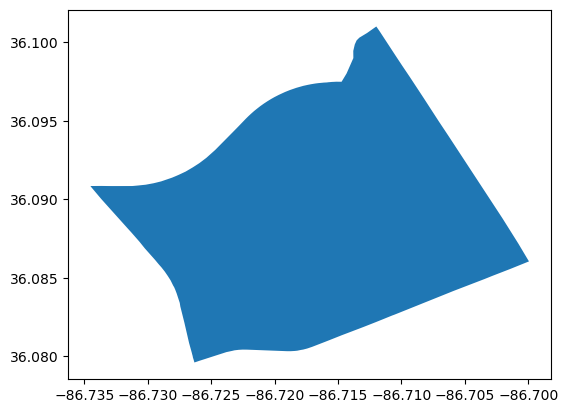

In [253]:
fips_2009.loc[fips_2009['name'].str.contains('Census Tract 190.01')].plot()

<AxesSubplot:>

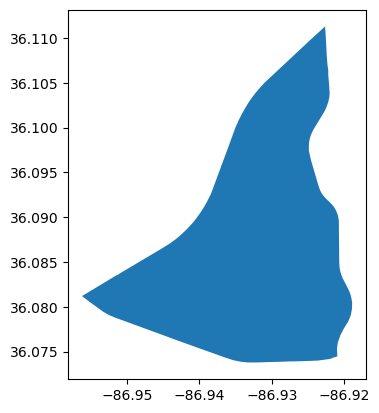

In [249]:
fips_2019.loc[fips_2019['name'].str.contains('Census Tract 184.01')].plot()

<AxesSubplot:>

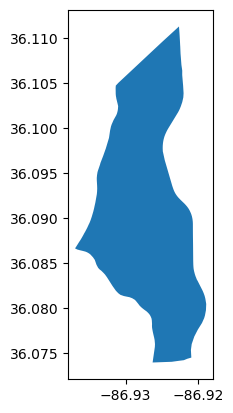

In [252]:
fips_2020.loc[fips_2020['name'].str.contains('Census Tract 184.11')].plot()

In [184]:
list(fips_2009.sort_values('name')['name'])

['Census Tract 101.01',
 'Census Tract 101.02',
 'Census Tract 102',
 'Census Tract 103.01',
 'Census Tract 103.02',
 'Census Tract 104.01',
 'Census Tract 104.02',
 'Census Tract 105.01',
 'Census Tract 105.02',
 'Census Tract 106',
 'Census Tract 107.01',
 'Census Tract 107.02',
 'Census Tract 108.01',
 'Census Tract 108.02',
 'Census Tract 109.01',
 'Census Tract 109.03',
 'Census Tract 109.04',
 'Census Tract 110.01',
 'Census Tract 110.02',
 'Census Tract 111',
 'Census Tract 112',
 'Census Tract 113',
 'Census Tract 114',
 'Census Tract 115',
 'Census Tract 116',
 'Census Tract 117',
 'Census Tract 118',
 'Census Tract 119',
 'Census Tract 120',
 'Census Tract 121',
 'Census Tract 122',
 'Census Tract 123',
 'Census Tract 124',
 'Census Tract 125',
 'Census Tract 126',
 'Census Tract 127.01',
 'Census Tract 127.02',
 'Census Tract 128.01',
 'Census Tract 128.02',
 'Census Tract 130',
 'Census Tract 131',
 'Census Tract 132',
 'Census Tract 133',
 'Census Tract 134',
 'Census Trac

In [185]:
list(fips_2019.sort_values('name')['name'])

['Census Tract 101.03',
 'Census Tract 101.04',
 'Census Tract 101.05',
 'Census Tract 101.06',
 'Census Tract 102.01',
 'Census Tract 102.02',
 'Census Tract 103.01',
 'Census Tract 103.02',
 'Census Tract 103.03',
 'Census Tract 104.01',
 'Census Tract 104.02',
 'Census Tract 105.01',
 'Census Tract 105.02',
 'Census Tract 106.01',
 'Census Tract 106.02',
 'Census Tract 107.01',
 'Census Tract 107.02',
 'Census Tract 108.01',
 'Census Tract 108.02',
 'Census Tract 109.01',
 'Census Tract 109.03',
 'Census Tract 109.04',
 'Census Tract 110.01',
 'Census Tract 110.02',
 'Census Tract 111',
 'Census Tract 112',
 'Census Tract 113',
 'Census Tract 114',
 'Census Tract 115',
 'Census Tract 116',
 'Census Tract 117',
 'Census Tract 118',
 'Census Tract 119',
 'Census Tract 121',
 'Census Tract 122',
 'Census Tract 126',
 'Census Tract 127.01',
 'Census Tract 127.02',
 'Census Tract 128.01',
 'Census Tract 128.02',
 'Census Tract 130',
 'Census Tract 131',
 'Census Tract 132.01',
 'Census T

In [195]:
list(fips_2020.sort_values('name')['name'])

['Census Tract 101.03',
 'Census Tract 101.04',
 'Census Tract 101.05',
 'Census Tract 101.06',
 'Census Tract 102.01',
 'Census Tract 102.02',
 'Census Tract 103.01',
 'Census Tract 103.02',
 'Census Tract 103.03',
 'Census Tract 104.01',
 'Census Tract 104.03',
 'Census Tract 104.04',
 'Census Tract 105.01',
 'Census Tract 105.02',
 'Census Tract 106.01',
 'Census Tract 106.02',
 'Census Tract 107.01',
 'Census Tract 107.02',
 'Census Tract 108.01',
 'Census Tract 108.02',
 'Census Tract 109.01',
 'Census Tract 109.03',
 'Census Tract 109.04',
 'Census Tract 110.01',
 'Census Tract 110.02',
 'Census Tract 111',
 'Census Tract 112',
 'Census Tract 113',
 'Census Tract 114',
 'Census Tract 115',
 'Census Tract 116',
 'Census Tract 117',
 'Census Tract 118',
 'Census Tract 119',
 'Census Tract 121',
 'Census Tract 122',
 'Census Tract 126',
 'Census Tract 127.01',
 'Census Tract 127.02',
 'Census Tract 128.01',
 'Census Tract 128.02',
 'Census Tract 130.01',
 'Census Tract 130.02',
 'Ce

In [231]:
list(fips_2009.sort_values('tract_geoid')['tract_geoid'])

['47037010101',
 '47037010102',
 '47037010200',
 '47037010301',
 '47037010302',
 '47037010401',
 '47037010402',
 '47037010501',
 '47037010502',
 '47037010600',
 '47037010701',
 '47037010702',
 '47037010801',
 '47037010802',
 '47037010901',
 '47037010903',
 '47037010904',
 '47037011001',
 '47037011002',
 '47037011100',
 '47037011200',
 '47037011300',
 '47037011400',
 '47037011500',
 '47037011600',
 '47037011700',
 '47037011800',
 '47037011900',
 '47037012000',
 '47037012100',
 '47037012200',
 '47037012300',
 '47037012400',
 '47037012500',
 '47037012600',
 '47037012701',
 '47037012702',
 '47037012801',
 '47037012802',
 '47037013000',
 '47037013100',
 '47037013200',
 '47037013300',
 '47037013400',
 '47037013500',
 '47037013600',
 '47037013700',
 '47037013800',
 '47037013900',
 '47037014000',
 '47037014100',
 '47037014200',
 '47037014300',
 '47037014400',
 '47037014500',
 '47037014600',
 '47037014700',
 '47037014800',
 '47037014900',
 '47037015000',
 '47037015100',
 '47037015200',
 '470370

In [232]:
list(fips_2019.sort_values('tract_geoid')['tract_geoid'])

['47037010103',
 '47037010104',
 '47037010105',
 '47037010106',
 '47037010201',
 '47037010202',
 '47037010301',
 '47037010302',
 '47037010303',
 '47037010401',
 '47037010402',
 '47037010501',
 '47037010502',
 '47037010601',
 '47037010602',
 '47037010701',
 '47037010702',
 '47037010801',
 '47037010802',
 '47037010901',
 '47037010903',
 '47037010904',
 '47037011001',
 '47037011002',
 '47037011100',
 '47037011200',
 '47037011300',
 '47037011400',
 '47037011500',
 '47037011600',
 '47037011700',
 '47037011800',
 '47037011900',
 '47037012100',
 '47037012200',
 '47037012600',
 '47037012701',
 '47037012702',
 '47037012801',
 '47037012802',
 '47037013000',
 '47037013100',
 '47037013201',
 '47037013202',
 '47037013300',
 '47037013400',
 '47037013500',
 '47037013601',
 '47037013602',
 '47037013700',
 '47037013800',
 '47037013900',
 '47037014200',
 '47037014300',
 '47037014400',
 '47037014800',
 '47037015100',
 '47037015200',
 '47037015300',
 '47037015401',
 '47037015402',
 '47037015404',
 '470370

In [233]:
list(fips_2020.sort_values('tract_geoid')['tract_geoid'])

['47037010103',
 '47037010104',
 '47037010105',
 '47037010106',
 '47037010201',
 '47037010202',
 '47037010301',
 '47037010302',
 '47037010303',
 '47037010401',
 '47037010403',
 '47037010404',
 '47037010501',
 '47037010502',
 '47037010601',
 '47037010602',
 '47037010701',
 '47037010702',
 '47037010801',
 '47037010802',
 '47037010901',
 '47037010903',
 '47037010904',
 '47037011001',
 '47037011002',
 '47037011100',
 '47037011200',
 '47037011300',
 '47037011400',
 '47037011500',
 '47037011600',
 '47037011700',
 '47037011800',
 '47037011900',
 '47037012100',
 '47037012200',
 '47037012600',
 '47037012701',
 '47037012702',
 '47037012801',
 '47037012802',
 '47037013001',
 '47037013002',
 '47037013100',
 '47037013201',
 '47037013202',
 '47037013300',
 '47037013400',
 '47037013500',
 '47037013600',
 '47037013701',
 '47037013702',
 '47037013800',
 '47037013900',
 '47037014200',
 '47037014300',
 '47037014400',
 '47037014800',
 '47037015100',
 '47037015200',
 '47037015300',
 '47037015401',
 '470370

In [ ]:
fips

In [166]:
#
# spatial join nashville parks boundary with FIPS
#
# data prep
parks = parks\
    .reset_index()\
    .rename(columns = {'index' : 'park_no'})
fips_2019 = fips_2019.rename(columns = {'name' : 'fips_name'})

fips_2019['tract_geo'] = fips_2019['geometry']

#
# join parks and FIPS where it's border is intersected at any point
# or parks located within FIPS
#
# Intersect
fips_2019_park_intersect = gpd\
    .sjoin(
        parks, fips_2019,
        how = 'inner', 
        op = 'intersects')
# within
fips_2019_park_within = gpd\
    .sjoin(
        parks, fips_2019,
        how = 'inner', 
        op = 'within')

# clean-up
fips_2019_park = pd\
    .concat([fips_2019_park_intersect, 
             fips_2019_park_within], 
            axis = 0)
fips_2019_park = fips_2019_park\
    .reset_index()\
    [['park_no', 'name', 'common_nam', 'year_estab', 'status', 'acres', 'tract_geoid', 'tract_geo', 'geometry']]\
    .reset_index(drop = True)

C:\Users\kimbh\AppData\Local\Temp\ipykernel_10104\965293665.py:17: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  fips_2019_park_intersect = gpd\
C:\Users\kimbh\AppData\Local\Temp\ipykernel_10104\965293665.py:23: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  fips_2019_park_within = gpd\


In [168]:
fips_2019_park.to_csv('../data/fips_2019_park.csv')

In [265]:
# Change parks crs before sjoin
parks = parks.set_crs(epsg = 4269, allow_override = True)

In [104]:
parks = parks\
    .reset_index()\
    .rename(columns = {'index' : 'park_no'})

In [268]:
fips_2019['tract_geo'] = fips_2019['geometry']

In [280]:
# join parks and FIPS where it's border is intersected at any point
# or parks located within FIPS
#
# Intersect
fips_2019_intersects = gpd\
    .sjoin(
        parks, fips_2019, 
        how = 'inner', 
        op = 'intersects')
# within
fips_2019_within = gpd\
    .sjoin(
        parks, fips_2019, 
        how = 'inner', 
        op = 'within')

# clean-up
fips_2019_park = pd\
    .concat([fips_2019_intersects, 
             fips_2019_within], 
            axis = 0)\
    .drop(columns = ['index_right'])


In [290]:
fips_2019_park.sort_values('year_estab')

,park_no,name_left,common_nam,year_estab,status,acres,geometry,tract_geoid,name_right,tract_geo
34,35,Watkins Park,Watkins,1901,PARK,8.12,"MULTIPOLYGON (((-86.79989 36.16147, -86.80088 ...",47037014400,Census Tract 144,"POLYGON ((-86.82252 36.15304, -86.82220 36.153..."
34,35,Watkins Park,Watkins,1901,PARK,8.12,"MULTIPOLYGON (((-86.79989 36.16147, -86.80088 ...",47037014400,Census Tract 144,"POLYGON ((-86.82252 36.15304, -86.82220 36.153..."
36,37,Centennial Park,Centennial,1903,PARK,125.14,"MULTIPOLYGON (((-86.81119 36.15085, -86.80961 ...",47037014400,Census Tract 144,"POLYGON ((-86.82252 36.15304, -86.82220 36.153..."
36,37,Centennial Park,Centennial,1903,PARK,125.14,"MULTIPOLYGON (((-86.81119 36.15085, -86.80961 ...",47037016500,Census Tract 165,"POLYGON ((-86.81075 36.13963, -86.81072 36.139..."
36,37,Centennial Park,Centennial,1903,PARK,125.14,"MULTIPOLYGON (((-86.81119 36.15085, -86.80961 ...",47037016600,Census Tract 166,"POLYGON ((-86.82282 36.14094, -86.82281 36.141..."
...,...,...,...,...,...,...,...,...,...,...
244,258,None,Mill Creek Greenway-Rivendell,2015,GW,25.9882102115,"MULTIPOLYGON (((-86.67363 36.03393, -86.67363 ...",47037019118,Census Tract 191.18,"POLYGON ((-86.67789 36.04066, -86.67788 36.040..."
244,258,None,Mill Creek Greenway-Rivendell,2015,GW,25.9882102115,"MULTIPOLYGON (((-86.67363 36.03393, -86.67363 ...",47037019118,Census Tract 191.18,"POLYGON ((-86.67789 36.04066, -86.67788 36.040..."
178,192,None,Ravenwood,2015,PARK,172.469097357,"MULTIPOLYGON (((-86.64250 36.19188, -86.64261 ...",47037015402,Census Tract 154.02,"POLYGON ((-86.66721 36.17706, -86.66715 36.177..."
176,190,None,Gulch Greenway,2015,GW,0.494884426675,"MULTIPOLYGON (((-86.78657 36.15792, -86.78659 ...",47037019500,Census Tract 195,"POLYGON ((-86.80272 36.15248, -86.80083 36.153..."


In [262]:
fips_2009.to_csv('../data/fips_2009.csv')
fips_2019.to_csv('../data/fips_2019.csv')
fips_2020.to_csv('../data/fips_2020.csv')

In [53]:
## read shape-file of FIPS block group
fips_bg = gpd.read_file('../data/cb_2021_us_all_500k/cb_2021_47_bg_500k/cb_2021_47_bg_500k.shp')
fips_tract = gpd.read_file('../data/cb_2021_us_all_500k/cb_2021_us_tract_500k/cb_2021_us_tract_500k.shp')

In [54]:
## extract TN, Davidson county
davidson_fips_bg = fips_bg\
    .loc[fips_bg['COUNTYFP'] == '037']\
    [['GEOID', 'geometry']]
davidson_fips_tract = fips_tract\
    .loc[fips_tract['COUNTYFP'] == '037']\
    [['GEOID', 'geometry']]

In [55]:
# add tract FIPS column
davidson_fips_bg['tract_geoid'] = davidson_fips_bg['GEOID'].str.slice(stop=-1)

In [56]:
davidson_fips = pd.merge(davidson_fips_bg, 
                         davidson_fips_tract, 
                         left_on = 'tract_geoid',
                         right_on = 'GEOID',
                         how = 'inner')

In [57]:
davidson_fips = davidson_fips\
    .rename(columns = {
        'GEOID_x' : 'bg_geoid',
        'geometry_x' : 'bg_geometry',
        'geometry_y' : 'tract_geometry'
    })\
    .drop(columns = ['GEOID_y'])\
    [['bg_geoid', 'tract_geoid', 'bg_geometry', 'tract_geometry']]

In [58]:
davidson_fips = gpd.GeoDataFrame(davidson_fips, crs="EPSG:4326", geometry='bg_geometry')

In [8]:
# export to csv
davidson_fips.to_csv('../data/davidson_fips.csv')
#davidson_fips_tract.to_csv('../data/davidson_fips_tract.csv')

In [ ]:
davidson_fips.head()

In [68]:
fips_bg_2009 = gpd.read_file('../data/tl_2009_47037_tract00/tl_2009_47037_tract00.shp')

In [72]:
fips_bg_2009

,STATEFP00,COUNTYFP00,TRACTCE00,CTIDFP00,NAME00,NAMELSAD00,MTFCC00,FUNCSTAT00,ALAND00,AWATER00,INTPTLAT00,INTPTLON00,geometry
0,47,037,018300,47037018300,183,Census Tract 183,G5020,S,136190657,1515891,+36.1062740,-086.9966165,"POLYGON ((-86.95136 36.08360, -86.95152 36.083..."
1,47,037,015401,47037015401,154.01,Census Tract 154.01,G5020,S,11271901,804569,+36.2226490,-086.6138057,"POLYGON ((-86.62180 36.21245, -86.62171 36.213..."
2,47,037,012600,47037012600,126,Census Tract 126,G5020,S,1188650,0,+36.1871396,-086.7719439,"POLYGON ((-86.76786 36.19401, -86.76764 36.193..."
3,47,037,017700,47037017700,177,Census Tract 177,G5020,S,8581589,0,+36.0974125,-086.7851814,"POLYGON ((-86.77107 36.11112, -86.77101 36.111..."
4,47,037,011002,47037011002,110.02,Census Tract 110.02,G5020,S,3689807,0,+36.2250171,-086.7399904,"POLYGON ((-86.74658 36.22740, -86.74663 36.227..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,47,037,016000,47037016000,160,Census Tract 160,G5020,S,1158910,0,+36.1454955,-086.7638143,"POLYGON ((-86.75599 36.14572, -86.75601 36.145..."
140,47,037,015610,47037015610,156.10,Census Tract 156.10,G5020,S,16555444,1269,+36.1492895,-086.5768386,"POLYGON ((-86.61886 36.15664, -86.61893 36.156..."
141,47,037,014900,47037014900,149,Census Tract 149,G5020,S,5638862,251916,+36.1492646,-086.7329567,"POLYGON ((-86.73350 36.14180, -86.73395 36.141..."
142,47,037,015801,47037015801,158.01,Census Tract 158.01,G5020,S,3637563,0,+36.1350618,-086.7092488,"POLYGON ((-86.69881 36.13600, -86.69849 36.135..."


In [73]:
fips_bg_2009['geoid'] = fips_bg_2009['STATEFP00'].str.cat(fips_bg_2009[['COUNTYFP00', 'TRACTCE00']])

In [77]:
davidson_fips.loc[~davidson_fips['tract_geoid'].isin(fips_bg_2009['geoid'])]

,bg_geoid,tract_geoid,bg_geometry,tract_geometry,tract_geo,bg_geo
5,470370156222,47037015622,"POLYGON ((-86.59370 36.18623, -86.59254 36.192...","POLYGON ((-86.59497 36.18271, -86.59370 36.186...","POLYGON ((-86.59497 36.18271, -86.59370 36.186...","POLYGON ((-86.59370 36.18623, -86.59254 36.192..."
6,470370156223,47037015622,"POLYGON ((-86.59497 36.18271, -86.59147 36.182...","POLYGON ((-86.59497 36.18271, -86.59370 36.186...","POLYGON ((-86.59497 36.18271, -86.59370 36.186...","POLYGON ((-86.59497 36.18271, -86.59147 36.182..."
7,470370156221,47037015622,"POLYGON ((-86.58488 36.17283, -86.58291 36.173...","POLYGON ((-86.59497 36.18271, -86.59370 36.186...","POLYGON ((-86.59497 36.18271, -86.59370 36.186...","POLYGON ((-86.58488 36.17283, -86.58291 36.173..."
15,470370195012,47037019501,"POLYGON ((-86.79930 36.14797, -86.79913 36.148...","POLYGON ((-86.80272 36.15248, -86.80084 36.153...","POLYGON ((-86.80272 36.15248, -86.80084 36.153...","POLYGON ((-86.79930 36.14797, -86.79913 36.148..."
16,470370195011,47037019501,"POLYGON ((-86.79137 36.15221, -86.78806 36.153...","POLYGON ((-86.80272 36.15248, -86.80084 36.153...","POLYGON ((-86.80272 36.15248, -86.80084 36.153...","POLYGON ((-86.79137 36.15221, -86.78806 36.153..."
...,...,...,...,...,...,...
474,470370183021,47037018302,"POLYGON ((-87.05470 36.04999, -87.05174 36.049...","POLYGON ((-87.05470 36.04999, -87.05174 36.049...","POLYGON ((-87.05470 36.04999, -87.05174 36.049...","POLYGON ((-87.05470 36.04999, -87.05174 36.049..."
479,470370156332,47037015633,"POLYGON ((-86.61354 36.14412, -86.59675 36.156...","POLYGON ((-86.61354 36.14412, -86.59675 36.156...","POLYGON ((-86.61354 36.14412, -86.59675 36.156...","POLYGON ((-86.61354 36.14412, -86.59675 36.156..."
480,470370156331,47037015633,"POLYGON ((-86.58649 36.15530, -86.58539 36.160...","POLYGON ((-86.61354 36.14412, -86.59675 36.156...","POLYGON ((-86.61354 36.14412, -86.59675 36.156...","POLYGON ((-86.58649 36.15530, -86.58539 36.160..."
485,470370156351,47037015635,"MULTIPOLYGON (((-86.52256 36.14128, -86.52106 ...","MULTIPOLYGON (((-86.52256 36.14128, -86.52106 ...","MULTIPOLYGON (((-86.52256 36.14128, -86.52106 ...","MULTIPOLYGON (((-86.52256 36.14128, -86.52106 ..."


In [78]:
fips_bg_2009.loc[~fips_bg_2009['geoid'].isin(davidson_fips['tract_geoid'])]

,STATEFP00,COUNTYFP00,TRACTCE00,CTIDFP00,NAME00,NAMELSAD00,MTFCC00,FUNCSTAT00,ALAND00,AWATER00,INTPTLAT00,INTPTLON00,geometry,geoid
0,47,037,018300,47037018300,183,Census Tract 183,G5020,S,136190657,1515891,+36.1062740,-086.9966165,"POLYGON ((-86.95136 36.08360, -86.95152 36.083...",47037018300
3,47,037,017700,47037017700,177,Census Tract 177,G5020,S,8581589,0,+36.0974125,-086.7851814,"POLYGON ((-86.77107 36.11112, -86.77101 36.111...",47037017700
6,47,037,015612,47037015612,156.12,Census Tract 156.12,G5020,S,11950442,17246,+36.1045930,-086.6411896,"POLYGON ((-86.63511 36.07485, -86.63513 36.074...",47037015612
10,47,037,018802,47037018802,188.02,Census Tract 188.02,G5020,S,8324850,23065,+36.0359496,-086.7553247,"POLYGON ((-86.74061 36.01427, -86.74121 36.014...",47037018802
11,47,037,012400,47037012400,124,Census Tract 124,G5020,S,764174,0,+36.1687759,-086.7607142,"POLYGON ((-86.75763 36.16373, -86.75787 36.164...",47037012400
12,47,037,012000,47037012000,120,Census Tract 120,G5020,S,690481,0,+36.1758263,-086.7524076,"POLYGON ((-86.75385 36.17354, -86.75388 36.173...",47037012000
14,47,037,012300,47037012300,123,Census Tract 123,G5020,S,1069818,0,+36.1681828,-086.7517576,"POLYGON ((-86.75385 36.17354, -86.75329 36.173...",47037012300
25,47,037,019001,47037019001,190.01,Census Tract 190.01,G5020,S,3761573,0,+36.0889580,-086.7164226,"POLYGON ((-86.71588 36.09744, -86.71576 36.097...",47037019001
29,47,037,018903,47037018903,189.03,Census Tract 189.03,G5020,S,4060840,0,+36.0634270,-086.7302607,"POLYGON ((-86.72389 36.07182, -86.72381 36.071...",47037018903
32,47,037,019107,47037019107,191.07,Census Tract 191.07,G5020,S,11394362,0,+36.0233810,-086.7230395,"POLYGON ((-86.73917 36.03970, -86.73924 36.039...",47037019107


## Metro Parks Boundaries API
Metro park API offered by https://data.nashville.gov/

In [162]:
# variables for API query
select = 'select=the_geom,name,common_nam,year_estab,status,acres'
limit = '&$limit=50000'

# Endpoint
query_url = f'https://data.nashville.gov/resource/544k-ba3u.geojson?${select}{limit}'

In [163]:
# create gdf
parks = gpd.read_file(query_url)

In [164]:
# clean-up
parks = parks[['name', 'common_nam', 'year_estab', 'status', 'acres', 'geometry']]

In [165]:
# remove parks has no year-established data
parks = parks.loc[~(parks['year_estab'] == '0')]

In [61]:
# Export to csv
parks.to_csv('../data/parks.csv')

## Spaital Join FIPS + Parks Boundaries

In [63]:
# check crs of shape-file
print(davidson_fips.crs)
#print(davidson_fips_bg.crs)
#print(davidson_fips_tract.crs)

epsg:4269


In [64]:
# Change parks crs before sjoin
parks = parks.set_crs(epsg = 4269, allow_override = True)

In [ ]:
parks = parks\
    .reset_index()\
    .rename(columns = {'index' : 'park_no'})

In [65]:
#
# spatial join nashville parks boundary with FIPS
#
# data prep
parks = parks\
    .reset_index()\
    .rename(columns = {'index' : 'park_no'})

davidson_fips['tract_geo'] = davidson_fips['tract_geometry']
davidson_fips['bg_geo'] = davidson_fips['bg_geometry']

#
# join parks and FIPS where it's border is intersected at any point
# or parks located within FIPS
#
# Intersect
davidson_fips_park_intersect = gpd\
    .sjoin(
        parks, davidson_fips,
        how = 'inner', 
        op = 'intersects')
# within
davidson_fips_park_within = gpd\
    .sjoin(
        parks, davidson_fips,
        how = 'inner', 
        op = 'within')

# clean-up
davidson_fips_park = pd\
    .concat([davidson_fips_park_intersect, 
             davidson_fips_park_within], 
            axis = 0)
davidson_fips_park = davidson_fips_park\
    .reset_index()\
    [['park_no', 'name', 'common_nam', 'year_estab', 'status', 'acres', 'bg_geoid', 'tract_geoid', 'tract_geo', 'bg_geo', 'geometry']]\
    .reset_index(drop = True)

In [67]:
# Export to csv
davidson_fips_park.to_csv('../data/davidson_fips_park.csv')

In [66]:
davidson_fips_park

,park_no,name,common_nam,year_estab,status,acres,bg_geoid,tract_geoid,tract_geo,bg_geo,geometry
0,0,Harpeth River Park,Harpeth River,1988,PARK,69.86,470370184092,47037018409,"POLYGON ((-86.98718 36.07301, -86.98225 36.075...","POLYGON ((-86.96813 36.07551, -86.95623 36.081...","MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,1,Harpeth Knoll Park,Harpeth Knoll,1972,PARK,9.88,470370184052,47037018405,"POLYGON ((-86.96793 36.03193, -86.96817 36.035...","POLYGON ((-86.95093 36.05357, -86.94675 36.054...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,5,Edwin Warner Park,Edwin Warner,1937,PARK,1113.12,470370184052,47037018405,"POLYGON ((-86.96793 36.03193, -86.96817 36.035...","POLYGON ((-86.95093 36.05357, -86.94675 36.054...","MULTIPOLYGON (((-86.89420 36.04865, -86.89429 ..."
3,235,None,Harpeth River Greenway - Warner - Warner Exchange,2008,GW,23.1109609364,470370184052,47037018405,"POLYGON ((-86.96793 36.03193, -86.96817 36.035...","POLYGON ((-86.95093 36.05357, -86.94675 36.054...","MULTIPOLYGON (((-86.91927 36.05110, -86.91976 ..."
4,236,None,Harpeth River Greenway - Warner - Harpeth Bend,2013,GW,33.2810709256,470370184052,47037018405,"POLYGON ((-86.96793 36.03193, -86.96817 36.035...","POLYGON ((-86.95093 36.05357, -86.94675 36.054...","MULTIPOLYGON (((-86.92983 36.05781, -86.93077 ..."
...,...,...,...,...,...,...,...,...,...,...,...
557,285,None,Whites Creek Community Garden,2014,PARK,7.30424931138,470370101061,47037010106,"POLYGON ((-86.83089 36.26570, -86.82902 36.265...","POLYGON ((-86.83089 36.26570, -86.82902 36.265...","MULTIPOLYGON (((-86.82873 36.25082, -86.82857 ..."
558,280,None,Stones River Greenway - Lebanon Pk to Dam,1999,GW,19.2924154188,470370155011,47037015501,"POLYGON ((-86.66438 36.16046, -86.66332 36.167...","POLYGON ((-86.65158 36.16490, -86.64853 36.167...","MULTIPOLYGON (((-86.64561 36.16866, -86.64537 ..."
559,281,None,Stones River Greenway - Lebanon Pk to Dam,2003,GW,6.47509410217,470370155011,47037015501,"POLYGON ((-86.66438 36.16046, -86.66332 36.167...","POLYGON ((-86.65158 36.16490, -86.64853 36.167...","MULTIPOLYGON (((-86.63068 36.16611, -86.63068 ..."
560,282,None,Stones River Greenway - Lebanon Pk to Dam,2003,GW,3.7454340524,470370155011,47037015501,"POLYGON ((-86.66438 36.16046, -86.66332 36.167...","POLYGON ((-86.65158 36.16490, -86.64853 36.167...","MULTIPOLYGON (((-86.62732 36.16291, -86.62669 ..."


## Index Test

In [173]:
# load credentials
with open('api_key.json') as fi:
    credentials = json.load(fi)

# CENSUS API key
census_api_key = '&key=' + credentials['census']

In [174]:
acs5_variables = pd.read_csv('../data/acs5_variables_1.csv')

In [255]:
host = 'https://api.census.gov/data'
dataset = '/acs/acs5'
location = '&for=tract:*&in=state:47&in=county:037'

error_group = []
tract_error = {2010 : [], 2011 : [], 2012 : [], 2013 : []}

acs5_index = pd.DataFrame()

years = range(2010, 2013+1)
for y in years:

    # Create empty df for all index
    temp_all_index = pd.DataFrame()

    # tell me which year is processing
    print(y)
    
    n = range(0, len(acs5_variables))
    for n in n:
        try:
            # reset temp df for merging
            temp = pd.DataFrame()

            # query
            variables = '?get=' + acs5_variables['index'][n]
            query_url = f"{host}/{y}{dataset}{variables}{location}{census_api_key}"

            # get a response
            response = requests.get(query_url)
            temp = pd.DataFrame(response.json())

            # clean-up
            temp.columns = temp.iloc[0]
            temp = temp[1:]
            temp = temp.drop(columns = ['state', 'county', 'tract'])

            # merge all index result
            temp_all_index = pd.concat([temp_all_index, temp], axis = 1, join = 'outer')
            temp_all_index = temp_all_index.loc[:, ~temp_all_index.columns.duplicated()]

        except:
            print(acs5_variables['index'][n])
            error_group.append(acs5_variables['index'][n])

    # add year to column name
    temp_all_index.columns = [str(col) + '_' + str(y) for col in temp_all_index.columns]
    
    # merge all year result
    acs5_index = pd.concat([acs5_index, temp_all_index], axis = 1)

2010
B25104_016E
B25104_017E
2011
B25104_016E
B25104_017E
2012
B25104_016E
B25104_017E
2013
B25104_016E
B25104_017E


In [256]:
error_group

['B25104_016E',
 'B25104_017E',
 'B25104_016E',
 'B25104_017E',
 'B25104_016E',
 'B25104_017E',
 'B25104_016E',
 'B25104_017E']

In [258]:
len(list(acs5_index.columns[acs5_index.isnull().all()]))

264

In [257]:
# indexes that don't cause error but results are empty
list(acs5_index.columns[acs5_index.isnull().all()])

['B07011PR_001E_2010',
 'B07011PR_002E_2010',
 'B07011PR_003E_2010',
 'B07011PR_004E_2010',
 'B07011PR_005E_2010',
 'B07011PR_006E_2010',
 'B07101_001E_2010',
 'B07101_002E_2010',
 'B07101_003E_2010',
 'B07101_004E_2010',
 'B07101_005E_2010',
 'B07101_006E_2010',
 'B07101_007E_2010',
 'B07101_008E_2010',
 'B07101_009E_2010',
 'B07101_010E_2010',
 'B07101_011E_2010',
 'B07101_012E_2010',
 'B07101_013E_2010',
 'B07101_014E_2010',
 'B07101_015E_2010',
 'B07101_016E_2010',
 'B07101_017E_2010',
 'B07101_018E_2010',
 'B07101_019E_2010',
 'B07101_020E_2010',
 'B07101_021E_2010',
 'B07101_022E_2010',
 'B07101_023E_2010',
 'B07101_024E_2010',
 'B07101_025E_2010',
 'B07101_026E_2010',
 'B07101_027E_2010',
 'B07101_028E_2010',
 'B07101_029E_2010',
 'B07101_030E_2010',
 'B07101_031E_2010',
 'B07101_032E_2010',
 'B07101_033E_2010',
 'B07101_034E_2010',
 'B07101_035E_2010',
 'B07101_036E_2010',
 'B07101_037E_2010',
 'B07101_038E_2010',
 'B07101_039E_2010',
 'B07101_040E_2010',
 'B07101_041E_2010',
 

In [41]:
tract_error[2009] = error_group[:-8]

In [43]:
tract_error[2010] = error_group[:-2]
tract_error[2011] = error_group[:-2]
tract_error[2012] = error_group[:-2]
tract_error[2013] = error_group[:-2]

## American Community Survey 5-Year API: Tract(2009+2013)

In [44]:
## CENSUS API
host = 'https://api.census.gov/data'
dataset = '/acs/acs5'
location = '&for=tract:*&in=state:47&in=county:037'

# Create empty df for all years
acs5_tract = pd.DataFrame()

## All years for-loop
years = range(2009, 2013+1)
for y in years:
    
    # Create empty df for all index
    temp_all_index = pd.DataFrame()
    
    # available variables
    acs5_available_variables = acs5_variables\
        .loc[~acs5_variables['index'].isin(tract_error[y])]\
        .loc[~(acs5_variables['index'].str.contains('B07101'))]
        
   ## All index for-loop 
    n = range(0, math.trunc(len(acs5_available_variables)/50)+1)  
    for n in n:
        
        # slice variables to groups
        index_str = ','.join(acs5_available_variables['index'][n*50 : (n+1)*50-1])
        variables = '?get=' + index_str
        
        # query
        query_url = f"{host}/{y}{dataset}{variables}{location}{census_api_key}"
        
        # get response
        response = requests.get(query_url)
        temp = pd.DataFrame(response.json())

        # data clean-up
        temp.columns = temp.iloc[0]
        temp = temp[1:]
        temp['tract_geoid'] = temp['state'].str.cat(temp[['county', 'tract']])
        temp = temp.drop(columns = ['state', 'county', 'tract'])
        
        # merge all index
        temp_all_index = pd.concat([temp_all_index, temp], axis = 1, join = 'outer')
     
    # add year column
    temp_all_index['year'] = y
    
    # merge all years
    acs5_tract = pd.concat([acs5_tract, temp_all_index], axis = 0)
    
    print(y)
    
# clean-up
reorder = list(acs5_tract.columns)
reorder = reorder[-2:] + reorder[:-2]
acs5_tract = acs5_tract[reorder]
acs5_tract = acs5_tract.loc[:, ~acs5_tract.columns.duplicated()]
    
    # Replace column name from index to label
    # Update columns name
    # acs5_bg.rename(columns = acs5_bg_variables_list.set_index('index')['label'], inplace = True)

2009
2010
2011
2012
2013


## American Community Survey 5-Year API: Tract(2013+2021)

In [45]:
## CENSUS API
host = 'https://api.census.gov/data'
dataset = '/acs/acs5'
location = '&for=tract:*&in=state:47&in=county:037'

# Create empty df for all years
acs5_tract_1 = pd.DataFrame()

## All years for-loop
years = range(2014, 2021+1)
for y in years:
    
    # Create empty df for all index
    temp_all_index = pd.DataFrame()
    
    # available variables
    acs5_available_variables = acs5_variables\
    .loc[~acs5_variables['index'].isin(tract_error[2013])]
    
   ## All index for-loop 
    n = range(0, math.trunc(len(acs5_available_variables)/50)+1)  
    for n in n:
        
        # slice variables to groups
        index_str = ','.join(acs5_available_variables['index'][n*50 : (n+1)*50-1])
        variables = '?get=' + index_str
        
        # query
        query_url = f"{host}/{y}{dataset}{variables}{location}{census_api_key}"
        
        # get response
        response = requests.get(query_url)
        temp = pd.DataFrame(response.json())

        # data clean-up
        temp.columns = temp.iloc[0]
        temp = temp[1:]
        temp['tract_geoid'] = temp['state'].str.cat(temp[['county', 'tract']])
        temp = temp.drop(columns = ['state', 'county', 'tract'])
        
        # merge all index
        temp_all_index = pd.concat([temp_all_index, temp], axis = 1, join = 'outer')
     
    # add year column
    temp_all_index['year'] = y
    
    # merge all years
    acs5_tract_1 = pd.concat([acs5_tract_1, temp_all_index], axis = 0)
    
    print(y)
    
# clean-up
reorder = list(acs5_tract_1.columns)
reorder = reorder[-2:] + reorder[:-2]
acs5_tract_1 = acs5_tract_1[reorder]
acs5_tract_1 = acs5_tract_1.loc[:, ~acs5_tract_1.columns.duplicated()]
    
    # Replace column name from index to label
    # Update columns name
    # acs5_bg.rename(columns = acs5_bg_variables_list.set_index('index')['label'], inplace = True)

2014
2015
2016
2017
2018
2019
2020
2021


In [46]:
acs5_tract = pd.concat([acs5_tract, acs5_tract_1], axis = 0)

In [48]:
acs5_tract.to_csv('../data/acs5_tract.csv')

## American Community Survey 5-Year API: Tract - B07 (2013+2021)

In [ ]:
## CENSUS API
host = 'https://api.census.gov/data'
dataset = '/acs/acs5'
location = '&for=tract:*&in=state:47&in=county:037'

## Import variable list
# B07 variables are oly available from 2013
acs5_tract_b07_variables_list = acs5_bg_variables_list\
    .loc[acs5_bg_variables_list['index'].str.contains('B07')]


## request API below this point

# Create empty df for all years
acs5_tract_b07 = pd.DataFrame()

## All years for loop
years = range(2013, 2021+1)
for y in years:
    
    # Create empty df for all index
    temp_all_index = pd.DataFrame()
    
   ## All index for loop 
    n = range(0, math.trunc(len(acs5_tract_b07_variables_list)/50)+1)  
    for n in n:
        
        # slice variables to groups
        index_str = ','.join(acs5_tract_b07_variables_list['index'][n*50 : (n+1)*50-1])
        variables = '?get=' + index_str
        
        # query
        query_url = f"{host}/{y}{dataset}{variables}{location}{census_api_key}"
        
        # get response
        response = requests.get(query_url)
        temp = pd.DataFrame(response.json())

        # data clean-up
        temp.columns = temp.iloc[0]
        temp = temp[1:]
        temp['tract_geoid'] = temp['state'].str.cat(temp[['county', 'tract']])
        temp = temp.drop(columns = ['state', 'county', 'tract'])
        
        # merge all index
        temp_all_index = pd.concat([temp_all_index, temp], axis = 1, join = 'outer')
     
    # add year column
    temp_all_index['year'] = y
    
    # merge all years
    acs5_tract_b07 = pd.concat([acs5_tract_b07, temp_all_index], axis = 0)
    
    print(y)
    
# clean-up
acs5_tract_b07 = acs5_tract_b07.loc[:, ~acs5_tract_b07.columns.duplicated()]
reorder = list(acs5_tract_b07.columns)
reorder = reorder[-2:] + reorder[:-2]
acs5_tract_b07 = acs5_tract_b07[reorder]

# combine B07 to acs5_tract
acs5_tract = pd.merge(acs5_tract, acs5_tract_b07, on = ['tract_geoid', 'year'], how = 'outer')
    
    # Replace column name from index to label
    # Update columns name
    # acs5_bg.rename(columns = acs5_bg_variables_list.set_index('index')['label'], inplace = True)

In [169]:
acs5_tract

NameError: name 'acs5_tract' is not defined

In [ ]:
## CENSUS API
host = 'https://api.census.gov/data'
dataset = '/acs/acs5'
location = '&for=tract:*&in=state:47&in=county:037'

## Import variable list
# B07 variables are oly available from 2013
acs5_tract_b07_variables_list = acs5_bg_variables_list\
    .loc[acs5_bg_variables_list['index'].str.contains('B07')]


## request API below this point

# Create empty df for all years
acs5_tract_b07 = pd.DataFrame()

## All years for loop
years = range(2013, 2021+1)
for y in years:
    
    # Create empty df for all index
    temp_all_index = pd.DataFrame()
    
   ## All index for loop 
    n = range(0, math.trunc(len(acs5_tract_b07_variables_list)/50)+1)  
    for n in n:
        
        # slice variables to groups
        index_str = ','.join(acs5_tract_b07_variables_list['index'][n*50 : (n+1)*50-1])
        variables = '?get=' + index_str
        
        # query
        query_url = f"{host}/{y}{dataset}{variables}{location}{census_api_key}"
        
        # get response
        response = requests.get(query_url)
        temp = pd.DataFrame(response.json())

        # data clean-up
        temp.columns = temp.iloc[0]
        temp = temp[1:]
        temp['tract_geoid'] = temp['state'].str.cat(temp[['county', 'tract']])
        temp = temp.drop(columns = ['state', 'county', 'tract'])
        
        # merge all index
        temp_all_index = pd.concat([temp_all_index, temp], axis = 1, join = 'outer')
     
    # add year column
    temp_all_index['year'] = y
    
    # merge all years
    acs5_tract_b07 = pd.concat([acs5_tract_b07, temp_all_index], axis = 0)
    
    print(y)
    
# clean-up
acs5_tract_b07 = acs5_tract_b07.loc[:, ~acs5_tract_b07.columns.duplicated()]
reorder = list(acs5_tract_b07.columns)
reorder = reorder[-2:] + reorder[:-2]
acs5_tract_b07 = acs5_tract_b07[reorder]

# combine B07 to acs5_tract
acs5_tract = pd.merge(acs5_tract, acs5_tract_b07, on = ['tract_geoid', 'year'], how = 'outer')
    
    # Replace column name from index to label
    # Update columns name
    # acs5_bg.rename(columns = acs5_bg_variables_list.set_index('index')['label'], inplace = True)

In [ ]:
acs5_tract.to_csv('../data/acs5_tract.csv')

In [ ]:
## CENSUS API
host = 'https://api.census.gov/data'
dataset = '/acs/acs5'
location = '&for=tract:*&in=state:47&in=county:037'

## Import variable list
# B07 variables are oly available from 2013
acs5_tract_b07_variables_list = variables_acs5_list\
    .loc[variables_acs5_list['index'].str.contains('B07')]

## All years for loop
years = range(2011, 2011+1)
for y in years:
    
    # Create empty df for all index
    temp_all_index = pd.DataFrame()
    
   ## All index for loop 
    n = range(0, math.trunc(len(acs5_tract_b07_variables_list)/50)+1)  
    for n in n:
        
        index_str = ','.join(acs5_tract_b07_variables_list['index'][n*50 : (n+1)*50-1])
        variables = '?get=' + 'B07013_001E'


        # query
        query_url = f"{host}/{y}{dataset}{variables}{location}{census_api_key}"

        # get response
        response = requests.get(query_url)
        temp = pd.DataFrame(response.json())
        
        # data clean-up
        temp.columns = temp.iloc[0]
        temp = temp[1:]
        temp['tract_geoid'] = temp['state'].str.cat(temp[['county', 'tract']])
        temp = temp.drop(columns = ['state', 'county', 'tract'])
        
        # merge all index
        temp_all_index = pd.concat([temp_all_index, temp], axis = 1, join = 'outer')

In [ ]:
temp_all_index.T.to_csv('../data/b07_1.csv')

In [ ]:
temp

In [ ]:
acs5_tract[['B07001_001E','B07001_017E', 'B07001_033E', 'B07001_049E', 'B07001_065E', 'B07001_081E']]

In [ ]:
## CENSUS API
host = 'https://api.census.gov/data'
dataset = '/acs/acs5'
location = '&for=tract:*&in=state:47&in=county:037'

## Import variable list
# remove unsupported variables from BG variables list
acs5_variables = acs5_variables_list\
    .loc[~acs5_variables_list['index'].isin(tract_error[y])]
acs5_variables_list = acs5_bg_variables_list\
    .loc[~acs5_bg_variables_list['index'].str.contains('B09')]\
    .loc[~acs5_bg_variables_list['index'].str.contains('B15')]
# B07 variables are oly available from 2013
acs5_tract_variables_list = acs5_bg_variables_list\
    .loc[~acs5_bg_variables_list['index'].str.contains('B07')]


## request API below this point

# Create empty df for all years
acs5_tract = pd.DataFrame()

## All years for loop
years = range(2009, 2021+1)
for y in years:
    
    # Create empty df for all index
    temp_all_index = pd.DataFrame()
    
   ## All index for loop 
    n = range(0, math.trunc(len(acs5_tract_variables_list)/50)+1)  
    for n in n:
        
        # slice variables to groups
        index_str = ','.join(acs5_tract_variables_list['index'][n*50 : (n+1)*50-1])
        variables = '?get=' + index_str
        
        # query
        query_url = f"{host}/{y}{dataset}{variables}{location}{census_api_key}"
        
        # get response
        response = requests.get(query_url)
        temp = pd.DataFrame(response.json())

        # data clean-up
        temp.columns = temp.iloc[0]
        temp = temp[1:]
        temp['tract_geoid'] = temp['state'].str.cat(temp[['county', 'tract']])
        temp = temp.drop(columns = ['state', 'county', 'tract'])
        
        # merge all index
        temp_all_index = pd.concat([temp_all_index, temp], axis = 1, join = 'outer')
     
    # add year column
    temp_all_index['year'] = y
    
    # merge all years
    acs5_tract = pd.concat([acs5_tract, temp_all_index], axis = 0)
    
    print(y)
    
# clean-up
reorder = list(acs5_tract.columns)
reorder = reorder[-2:] + reorder[:-2]
acs5_tract = acs5_tract[reorder]
acs5_tract = acs5_tract.loc[:, ~acs5_tract.columns.duplicated()]
    
    # Replace column name from index to label
    # Update columns name
    # acs5_bg.rename(columns = acs5_bg_variables_list.set_index('index')['label'], inplace = True)

## American Community Survey 5-Year API: Block Group(2013+2021)

In [ ]:
acs5_bg_variables_list.loc[~acs5_bg_variables_list['index'].isin(bg_not_available)]

In [ ]:
acs5_variables_list['index'].str.contains('|'.join(tract_200[y]))

In [ ]:
acs5_variables_list.loc[~acs5_variables_list['index'].str.contains('|'.join(tract_200[y]))]

In [ ]:
    n = range(0, math.trunc(len(acs5_bg_variables_list)/50)+1)  
    
        index_str = ','.join(acs5_bg_variables_list['index'][n*50 : (n+1)*50-1])
        variables = '?get=' + index_str

In [ ]:
    n = range(0, math.trunc(len(acs5_bg_variables_list))) 
    for n in n:
        
        print(acs5_bg_variables_list['index'][n])
     
         # Empty temp df
        temp = pd.DataFrame()
        
        # slice variables to groups
        variables = '?get=' + acs5_bg_variables_list['index'][n]

In [ ]:
acs5_bg_variables_list['index'][3*50 : (3+1)*50-1]

In [ ]:
## CENSUS API
host = 'https://api.census.gov/data'
dataset = '/acs/acs5'
location = '&for=block%20group:*&in=state:47&in=county:037&in=tract:*'

# Import variable list
acs5_bg_variables_list = acs5_variables_list\
    .loc[~acs5_variables_list['index'].str.contains('|'.join(bg_200))]

#acs5_bg_variables_list = acs5_bg_variables_list\
#    .loc[~acs5_bg_variables_list['index'].str.contains('B07')]


# Create empty df
acs5_bg = pd.DataFrame()

## All years for-loop
years = range(2013, 2021+1)
for y in years:
    
    # Empty temp df
    temp_all_index = pd.DataFrame()
    
    ## All index for-loop 
    n = range(0, math.trunc(len(acs5_bg_variables_list)/50)+1)  
    for n in n:
        
        print(acs5_bg_variables_list['index'][n])
     
         # Empty temp df
        temp = pd.DataFrame()
        
        # slice variables to groups
        index_str = ','.join(acs5_bg_variables_list['index'][n*50 : (n+1)*50-1])
        variables = '?get=' + index_str
        
        # query
        query_url = f"{host}/{y}{dataset}{variables}{location}{census_api_key}"
        
        # get response
        response = requests.get(query_url)
        temp = pd.DataFrame(response.json())

        # data clean-up
        temp.columns = temp.iloc[0]
        temp = temp[1:]
        temp['bg_geoid'] = temp['state'].str.cat(temp[['county', 'tract', 'block group']])
        temp['tract_geoid'] = temp['bg_geoid'].str.slice(stop=-1)
        temp = temp.drop(columns = ['state', 'county', 'tract', 'block group'])
        
        # merge all df
        temp_all_index = pd.concat([temp_all_index, temp], axis = 1, join = 'outer')
     
    # add year and tract geoid columns
    temp_all_index['year'] = y
    
    # merge all years
    acs5_bg = pd.concat([acs5_bg, temp_all_index], axis = 0)
    
    print(y)
    
# clean-up
reorder = list(acs5_bg.columns)
reorder = reorder[-3:] + reorder[:-3]
acs5_bg = acs5_bg[reorder]
acs5_bg = acs5_bg.loc[:, ~acs5_bg.columns.duplicated()]
    
    # Replace column name from index to label
    # Update columns name
    # acs5_bg.rename(columns = acs5_bg_variables_list.set_index('index')['label'], inplace = True)

In [ ]:
acs5_bg

In [ ]:
# export to csv
acs5_bg.to_csv('../data/acs5_bg.csv')

# Update columns name
acs5_tract.rename(columns = acs5_tract_variables_list.set_index('index')['label'], inplace = True)

In [ ]:
acs5_tract = acs5_tract.loc[:, ~acs5_tract.columns.duplicated()]

In [ ]:
# Export to csv
acs5_tract.to_csv('../data/acs5_tract.csv')

## Decennial

In [ ]:
dec_2010 = pd.read_csv('../data/DECENNIALSF32000.H009-2023-04-17T195749.csv')

In [ ]:
dec_2010 = dec_2010.T.reset_index()
dec_2010.columns = dec_2010.iloc[0]
dec_2010 = dec_2010[1:]
dec_2010 = dec_2010.rename(columns = {'Label (Grouping)' : 'label'})

In [ ]:
dec_2010

## Variables list

ACS 5 year Variables

# get variables.json file
endpoint = 'https://api.census.gov/data/2000/dec/sf3profile/variables.json'
response = requests.get(endpoint)

# convert json to df
variables_dec_list = response.json()
variables_dec_list = pd.DataFrame(variables_dec_list['variables']).transpose().reset_index()

variables_dec_list.loc[variables_dec_list['index'].str.contains('H039')]

variables_dec_list.loc[variables_dec_list['label'].str.contains('Move')]

In [ ]:
# get variables.json file
endpoint = 'https://api.census.gov/data/2021/acs/acs5/variables.json'
response = requests.get(endpoint)

# convert json to df
variables_acs5_list = response.json()
variables_acs5_list = pd.DataFrame(variables_acs5_list['variables']).transpose().reset_index()

In [ ]:
variables_acs5_list.to_csv('../data/variables.csv')

variables_list.loc[variables_list['index'].isin(['B02001_001E','B02001_002E','B02001_003E','B02001_004E','B02001_005E','B02001_006E','B02001_007E','B02001_008E','B02001_009E','B02001_010E','B03001_003E'])]

# 1st row of each groups
variables_cat = variables_list\
    .sort_values('index')\
    .groupby('group').nth(0)

income 19  x
race 02 X
household type B09019 X
Educational Attainment B15003 x
occupation industry C24010 (full time over 16) x
Family Type by Presence and Age of Own Children B11003 D
Household Type by Household Size B11016 D
Housing Units B25001 X
Occupancy Status B25002 X
Tenure B25003 X
Total Population in Occupied Housing Units by Tenure by Year Householder Moved Into Unit B25026 NOT AVAILABLE
housing Value B25075 x
Lower Value Quartile (Dollars) B25076 x
Median Value (Dollars) B25077 x 
Upper Value Quartile (Dollars) B25078 x
Mortgage Status and Selected Monthly Owner Costs B25087
Median Contract Rent (Dollars) B25058
Median Selected Monthly Owner Costs as a Percentage of Household Income B25092
Family Income B19101

In [ ]:
host = 'https://api.census.gov/data'
dataset = '/acs/acs5'
location = '&for=tract:*&in=state:47&in=county:037'
acs5_variables_group = acs5_variables.sort_values('index').groupby('group').nth(0).reset_index()

error_group = []
tract_error = {2009 : [], 2010 : [], 2011 : [], 2012 : [], 2013 : [], 2014 : [], 2015 : [], 
               2016 : [], 2017 : [], 2018 : [], 2019 : [], 2020 : [], 2021 : [],}

acs5_index = pd.DataFrame()

years = range(2009, 2021+1)
for y in years:

    # Create empty df for all index
    temp_all_index = pd.DataFrame()

    # tell me which year is processing
    print(y)
    
    n = range(0, len(acs5_variables_group))
    for n in n:
        try:
            # reset temp df for merging
            temp = pd.DataFrame()

            # query
            variables = '?get=' + ','.join(acs5_variables\
                .loc[acs5_variables['index'].str.contains(acs5_variables_group['group'][n])])
            query_url = f"{host}/{y}{dataset}{variables}{location}{census_api_key}"

            # get a response
            response = requests.get(query_url)
            temp = pd.DataFrame(response.json())

            # clean-up
            temp.columns = temp.iloc[0]
            temp = temp[1:]
            temp = temp.drop(columns = ['state', 'county', 'tract'])

            # merge all index result
            temp_all_index = pd.concat([temp_all_index, temp], axis = 1, join = 'outer')
            temp_all_index = temp_all_index.loc[:, ~temp_all_index.columns.duplicated()]

        except:
            error_group.append(acs5_variables_group['group'][n])
            
    # add year to column name
    temp_all_index.columns = [str(col) + '_' + str(y) for col in temp_all_index.columns]
    
    # merge all year result
    acs5_index = pd.concat([acs5_index, temp_all_index], axis = 1)
    
    print(f'{y} now searching for error index')
    for e in error_group:
        try:
            print(error_group[e])
            # reset temp df for merging
            temp = pd.DataFrame()

            # query
            variables = '?get=' + ','.join(acs5_variables\
                .loc[acs5_variables['index'].str.contains(error_group[e])])

            # get a response
            response = requests.get(query_url)
            temp = pd.DataFrame(response.json())

            # clean-up
            temp.columns = temp.iloc[0]
            temp = temp[1:]
            temp = temp.drop(columns = ['state', 'county', 'tract'])

            # merge all index result
            temp_all_index = pd.concat([temp_all_index, temp], axis = 1, join = 'outer')
            temp_all_index = temp_all_index.loc[:, ~temp_all_index.columns.duplicated()]

        except:
            tract_error[y].append(e)
            
    # add year to column name
    temp_all_index.columns = [str(col) + '_' + str(y) for col in temp_all_index.columns]
    
    # merge all year result
    acs5_index = pd.concat([acs5_index, temp_all_index], axis = 1)